In [1]:
%store

Stored variables and their in-db values:
df                         ->         RevolvingUtilizationOfUnsecuredLines  age 
model                      -> XGBClassifier(base_score=0.5, booster='gbtree', co
train_prepared             ->         RevolvingUtilizationOfUnsecuredLines  age 


In [2]:
%store -r 
data = df
print(data.shape)

(150000, 11)


### Informations sur le dataset

In [3]:
from pandas import set_option

# data.head(20)
# data.dtypes

set_option('display.width', 100)
set_option('precision', 3)
data.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,150000.000,150000.000,150000.000,150000.000,1.203e+05,150000.000,150000.000,150000.000,150000.000,146076.000,150000.000
mean,6.048,52.295,0.421,353.005,6.670e+03,8.453,0.266,1.018,0.240,0.757,0.067
std,249.755,14.772,4.193,2037.819,1.438e+04,5.146,4.169,1.130,4.155,1.115,0.250
min,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.030,41.000,0.000,0.175,3.400e+03,5.000,0.000,0.000,0.000,0.000,0.000
50%,0.154,52.000,0.000,0.367,5.400e+03,8.000,0.000,1.000,0.000,0.000,0.000
75%,0.559,63.000,0.000,0.868,8.249e+03,11.000,0.000,2.000,0.000,1.000,0.000
max,50708.000,109.000,98.000,329664.000,3.009e+06,58.000,98.000,54.000,98.000,20.000,1.000


### Distribution des outputs

In [4]:
class_counts = data.groupby('SeriousDlqin2yrs').size()
print(class_counts)

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64


### Corrélation de Pearson

In [5]:
# 1 ou -1 Forte correlation positive ou négative , 0 pas de corrélation du tout 
set_option('display.width', 100)
set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                                      RevolvingUtilizationOfUnsecuredLines    age  \
RevolvingUtilizationOfUnsecuredLines                                 1.000 -0.006   
age                                                                 -0.006  1.000   
NumberOfTime30-59DaysPastDueNotWorse                                -0.001 -0.063   
DebtRatio                                                            0.004  0.024   
MonthlyIncome                                                        0.007  0.038   
NumberOfOpenCreditLinesAndLoans                                     -0.011  0.148   
NumberOfTimes90DaysLate                                             -0.001 -0.061   
NumberRealEstateLoansOrLines                                         0.006  0.033   
NumberOfTime60-89DaysPastDueNotWorse                                -0.001 -0.057   
NumberOfDependents                                                   0.002 -0.213   
SeriousDlqin2yrs                                                 

In [6]:
skew = data.skew()
print(skew)

RevolvingUtilizationOfUnsecuredLines     97.632
age                                       0.189
NumberOfTime30-59DaysPastDueNotWorse     22.597
DebtRatio                                95.158
MonthlyIncome                           114.040
NumberOfOpenCreditLinesAndLoans           1.215
NumberOfTimes90DaysLate                  23.087
NumberRealEstateLoansOrLines              3.482
NumberOfTime60-89DaysPastDueNotWorse     23.332
NumberOfDependents                        1.588
SeriousDlqin2yrs                          3.469
dtype: float64


### Distribution de chaque feature

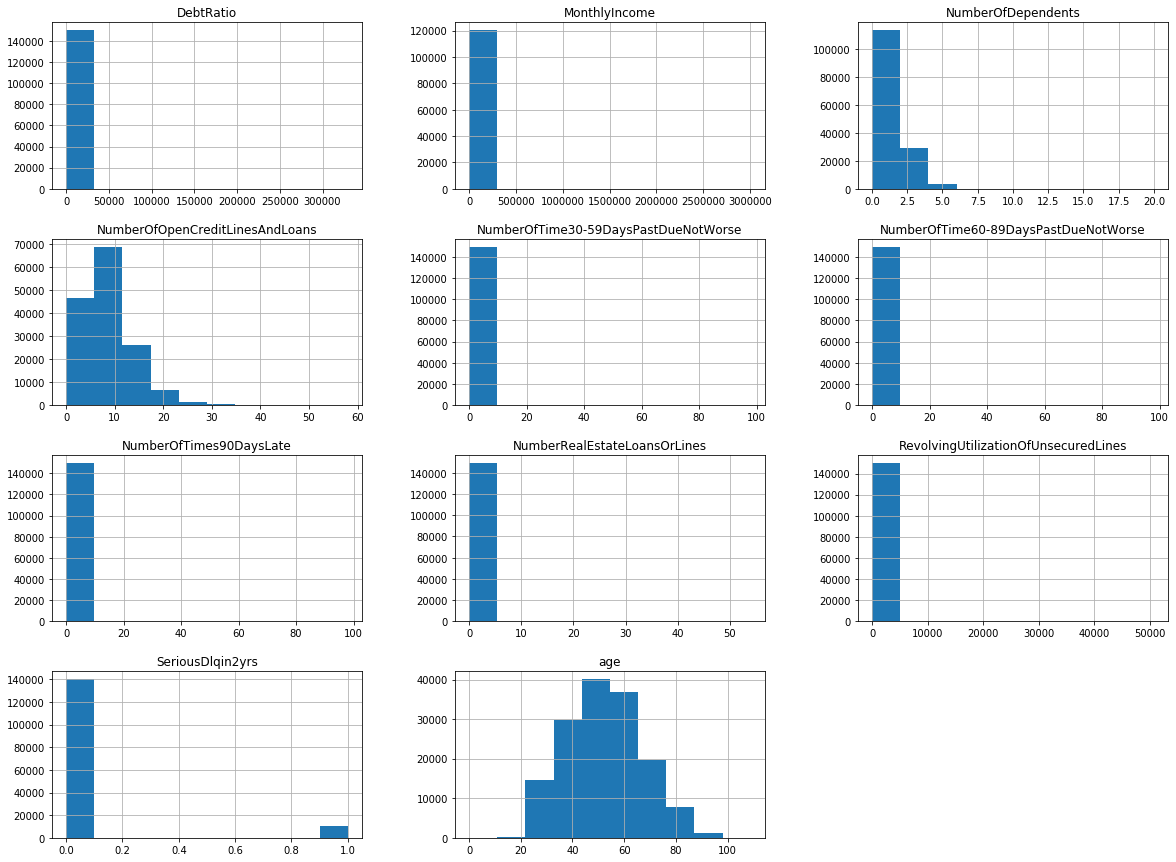

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [20 , 15]
data.hist()
plt.show()

### Density Plots

<function matplotlib.pyplot.show(*args, **kw)>

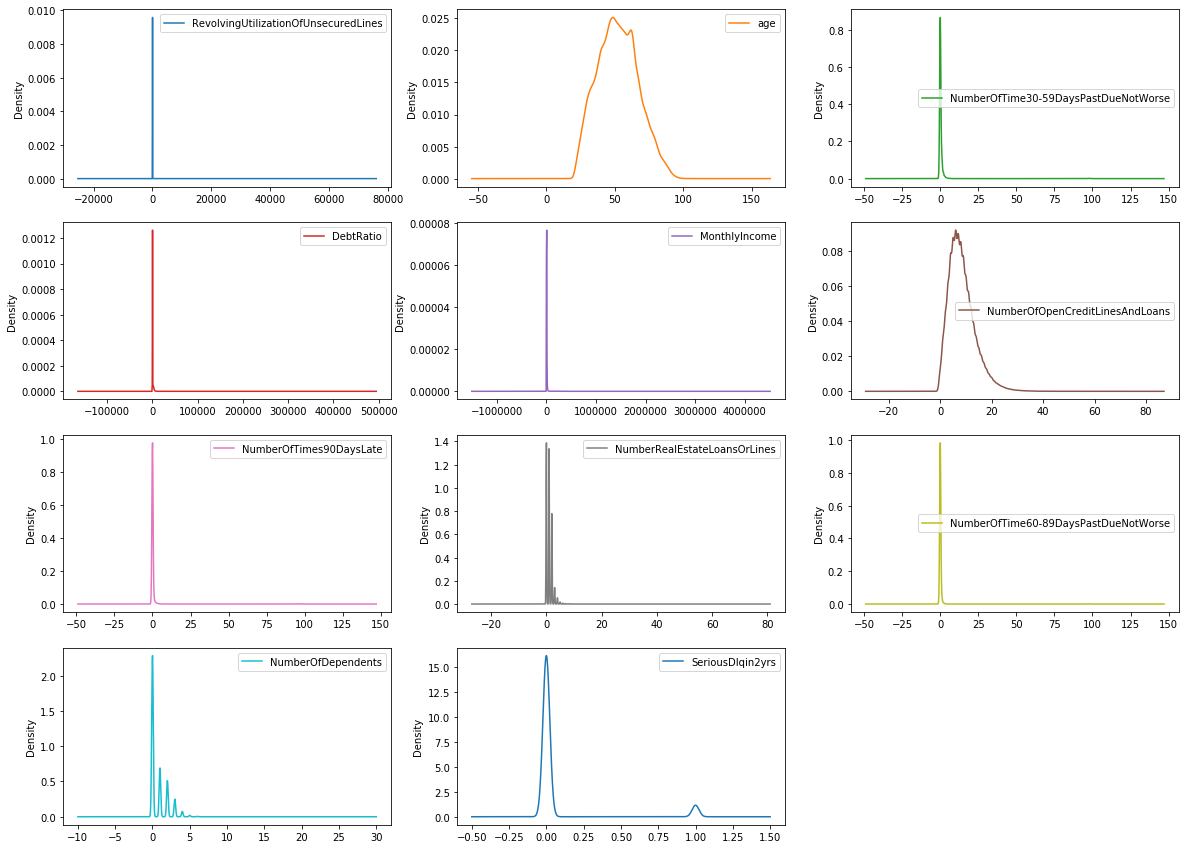

In [17]:
data.plot(kind='density', subplots=True, layout=(4,3),  sharex=False)
plt.show

### Box & Whisker Plots 

<function matplotlib.pyplot.show(*args, **kw)>

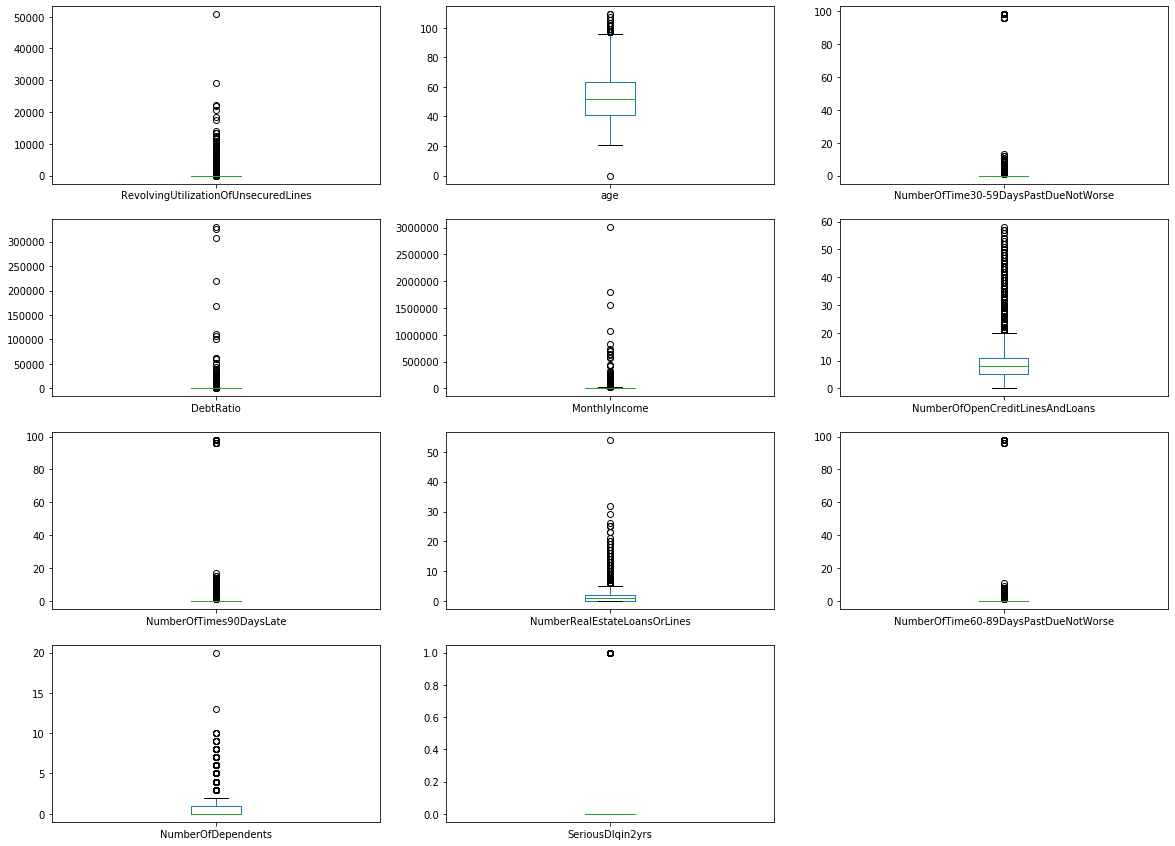

In [20]:
data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show

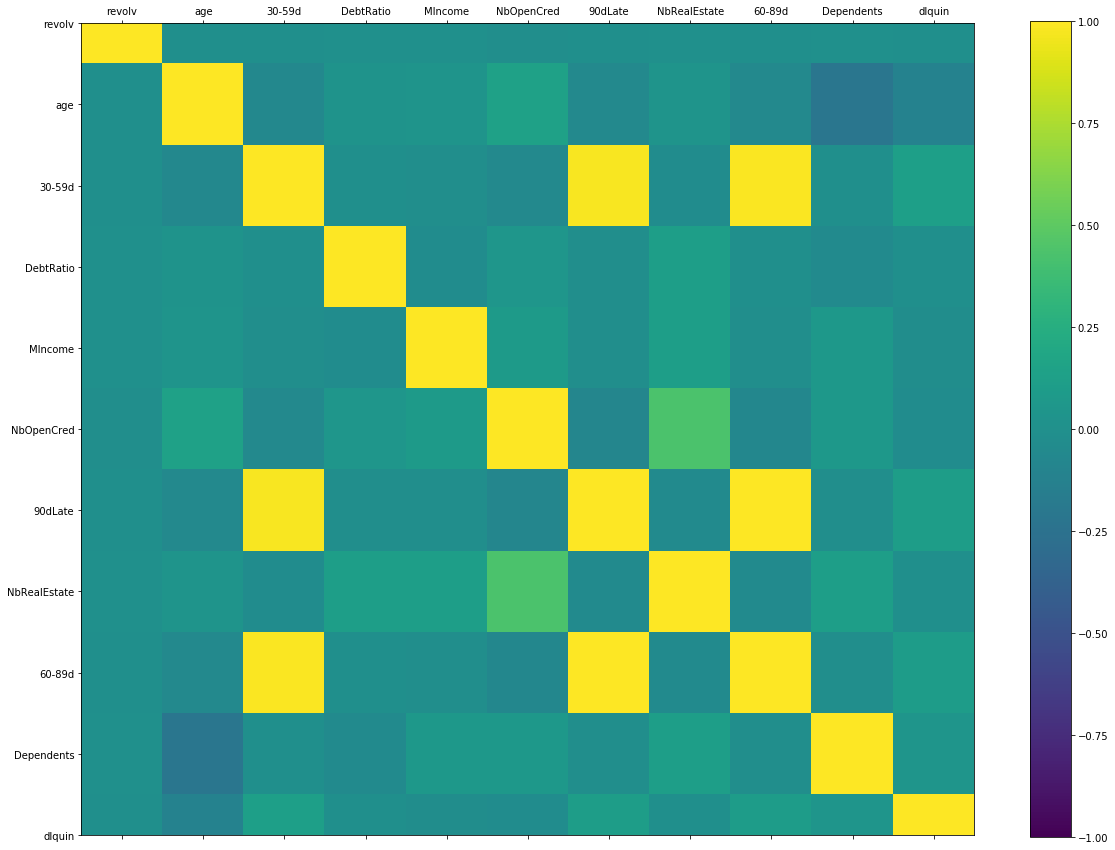

In [59]:
import numpy

col_names_train = data.columns.values # Nom des colonnes de train_df


names=['revolv','age','30-59d','DebtRatio','MIncome','NbOpenCred','90dLate','NbRealEstate','60-89d','Dependents','dlquin']


correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


### Scatter Plot Matrix

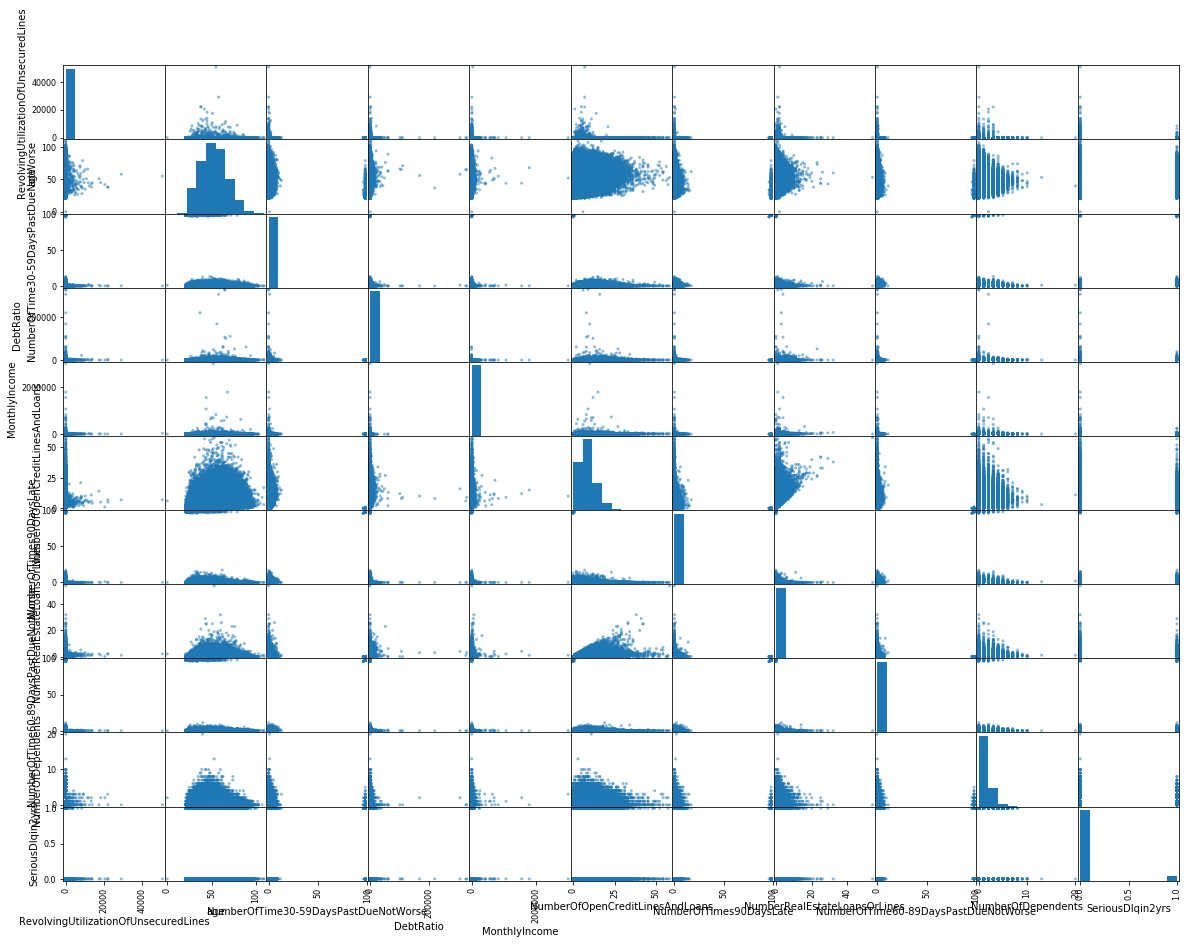

In [61]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()